## Read in the full data

In [1]:
data=read.csv('/dagher/dagher11/filip/UPF/data/dataset_excluded.csv', quote='"')
NOVA_data=read.csv('/dagher/dagher11/filip/UPF/data/NOVA_energy_values_wide.csv', quote='"', sep=' ')
data=merge(data, NOVA_data, by.x='eid', by.y='participant', all.x=T)
#data=subset(data, !is.na(data$uk_biobank_assessment_centre_54.2.0))

In [4]:
data=subset(data, !is.na(data$uk_biobank_assessment_centre_54.2.0))
cor.test(data$body_mass_index_bmi_21001.0.0, data$upf_per)


	Pearson's product-moment correlation

data:  data$body_mass_index_bmi_21001.0.0 and data$upf_per
t = 12.545, df = 33724, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05752165 0.07876764
sample estimates:
       cor 
0.06815237 


# Read in data directly merged with NOVA already

In [44]:
library(dplyr)
data=read.table('/dagher/dagher11/filip/UPF/data/final_dataframe.csv',quote='"', sep=',')

## Read in data with missing subcortical structures and merge

In [45]:
data_sub=read.csv('/dagher/dagher11/filip/MAPT_OB/data/dataset_excluded_new.csv', quote='"')
data_sub=dplyr::select(data_sub, eid, volume_of_pallidum_right_25018.2.0, volume_of_hippocampus_left_25019.2.0, 
                volume_of_hippocampus_right_25020.2.0, volume_of_amygdala_left_25021.2.0, volume_of_amygdala_right_25022.2.0)

In [46]:
data=merge(data, data_sub, by='eid', all.x=T)

# Get DTI and SWI data

In [47]:
data_dti=read.table('/dagher/dagher11/filip/Downloads/UKB_WM_Regionwise_Data_allAtlases_allMeasures.csv', quote='"', sep=',', header=T) # This is in long format and the next files are in wide format
data_swi=read.table('~/Downloads/SWI_raw_data.csv', quote='"', sep=',', header=T)
data_dti_FA=read.table('~/Downloads/UKBB_fa_data_other.csv', quote='"', sep=',', header=T)
data_dti_MD=read.table('~/Downloads/UKBB_md_data_other.csv', quote='"', sep=',', header=T)
data_dti_AD=read.table('~/Downloads/UKBB_ad_data_other.csv', quote='"', sep=',', header=T)
data_dti_RD=read.table('~/Downloads/UKBB_rd_data_other.csv', quote='"', sep=',', header=T)
data_dti_FA=data_dti_FA[c(2, 21:length(data_dti_FA))]
data_dti_MD=data_dti_MD[c(2, 21:length(data_dti_MD))]
data_dti_AD=data_dti_AD[c(2, 21:length(data_dti_AD))]
data_dti_RD=data_dti_RD[c(2, 21:length(data_dti_RD))]

In [48]:
colnames(data_dti_FA)=paste(colnames(data_dti_FA),'FA',sep='_')
colnames(data_dti_MD)=paste(colnames(data_dti_MD),'MD',sep='_')
colnames(data_dti_AD)=paste(colnames(data_dti_AD),'AD',sep='_')
colnames(data_dti_RD)=paste(colnames(data_dti_RD),'RD',sep='_')

In [49]:
data_dti_wide=reshape(data_dti, idvar = "Subject_ID", timevar = "WM_Measure", direction = "wide") #This creates some of the same variables with .MD that are the same as _MD
data=merge(data, data_dti_wide, by.x='eid', by.y='Subject_ID', all.x=T)

In [50]:
data=merge(data, data_dti_FA, by.x='eid', by.y='Subject_ID_FA', all.x=T)
data=merge(data, data_dti_MD, by.x='eid', by.y='Subject_ID_MD', all.x=T)
data=merge(data, data_dti_RD, by.x='eid', by.y='Subject_ID_RD', all.x=T)
data=merge(data, data_dti_AD, by.x='eid', by.y='Subject_ID_AD', all.x=T)

In [51]:
data=merge(data, data_swi, by.x='eid', by.y='eid', all.x=T)

In [52]:
data$alcohol=dplyr::coalesce(data$`alcohol_consumed_100580.4.0`,
                     data$`alcohol_consumed_100580.3.0`,
                     data$`alcohol_consumed_100580.2.0`,
                     data$`alcohol_consumed_100580.1.0`,
                     data$`alcohol_consumed_100580.0.0`)

In [53]:
data$thalamus_FA=rowMeans(cbind(data$left_thalamus.FA, data$right_thalamus.FA))
data$amygdala_FA=rowMeans(cbind(data$left_amygdala.FA, data$right_amygdala.FA))
data$thalamus_MD=rowMeans(cbind(data$left_thalamus.MD, data$right_thalamus.MD))
data$amygdala_MD=rowMeans(cbind(data$left_amygdala.MD, data$right_amygdala.MD))
data$thalamus_AD=rowMeans(cbind(data$left_thalamus.AD, data$right_thalamus.AD))
data$amygdala_AD=rowMeans(cbind(data$left_amygdala.AD, data$right_amygdala.AD))
data$thalamus_RD=rowMeans(cbind(data$left_thalamus.RD, data$right_thalamus.RD))
data$amygdala_RD=rowMeans(cbind(data$left_amygdala.RD, data$right_amygdala.RD))
data$full_hypo.FA=data$full_hypo_FA
data$full_hypo.MD=data$full_hypo_MD
data$full_hypo.RD=data$full_hypo_RD
data$full_hypo.AD=data$full_hypo_AD
data$left_globus_pallidus.FA=rowMeans(cbind(data$left_globus_pallidus_externa.FA, data$right_globus_pallidus_interna.FA))
data$left_globus_pallidus.MD=rowMeans(cbind(data$left_globus_pallidus_externa.MD, data$right_globus_pallidus_interna.MD))
data$right_globus_pallidus.FA=rowMeans(cbind(data$right_globus_pallidus_externa.FA, data$right_globus_pallidus_interna.FA))
data$right_globus_pallidus.MD=rowMeans(cbind(data$right_globus_pallidus_externa.MD, data$right_globus_pallidus_interna.MD))

# Add NODDI measures

In [54]:
noddi=read.table('~/Downloads/UKB_NODDI_Regionwise_Subcortical_Filip.csv', quote='"', sep=',', header=T)

In [55]:
noddi$full_hypo=rowMeans(cbind(dplyr::select(noddi, anterior_hypothalamic_area_L.nii.gz, arcuate_hypothalamic_nucleus_L.nii.gz, 
                                      dorsal_periventricular_hypothalamic_nucleus_L.nii.gz, dorsomedial_hypothalamic_nucleus_L.nii.gz, 
                                      lateral_hypothalamus_L.nii.gz, mammillary_bodies_L.nii.gz, medial_preoptic_nucleus_L.nii.gz, 
                                      paraventricular_nucleus_L.nii.gz, periventricular_hypothalamic_nucleus_L.nii.gz, 
                                      posterior_hypotahalamic_nucleus_L.nii.gz, suprachiasmatic_hypothalamic_nucleus_L.nii.gz, 
                                      supraoptic_hypothalamic_nucleus_L.nii.gz, tuberomammillary_hypothalamic_nucleus_L.nii.gz, 
                                      ventromedial_hypothalamus_L.nii.gz, anterior_hypothalamic_area_R.nii.gz, 
                                      arcuate_hypothalamic_nucleus_R.nii.gz, dorsal_periventricular_hypothalamic_nucleus_R.nii.gz, 
                                      dorsomedial_hypothalamic_nucleus_R.nii.gz, lateral_hypothalamus_R.nii.gz, mammillary_bodies_R.nii.gz, 
                                      medial_preoptic_nucleus_R.nii.gz, paraventricular_nucleus_R.nii.gz, 
                                      periventricular_hypothalamic_nucleus_R.nii.gz, posterior_hypotahalamic_nucleus_R.nii.gz, 
                                      suprachiasmatic_hypothalamic_nucleus_R.nii.gz, supraoptic_hypothalamic_nucleus_R.nii.gz, 
                                      tuberomammillary_hypothalamic_nucleus_R.nii.gz, ventromedial_hypothalamus_R.nii.gz)))

noddi$globus_pallidus_LH=rowMeans(cbind(dplyr::select(noddi, MNI_PD25_subcortical_LH_globus_pallidus_externus.nii.gz,
                                                      MNI_PD25_subcortical_LH_globus_pallidus_internus.nii.gz)))
noddi$globus_pallidus_RH=rowMeans(cbind(dplyr::select(noddi, MNI_PD25_subcortical_RH_globus_pallidus_externus.nii.gz,
                                                      MNI_PD25_subcortical_RH_globus_pallidus_Internus.nii.gz)))

In [56]:
noddi_wide=reshape(noddi, idvar = "Subject_ID", timevar = "NODDI_Measure", direction = "wide")

In [57]:
data=merge(data, noddi_wide, by.x='eid', by.y='Subject_ID', all.x=T)

# Remove outliers

In [58]:
sum(is.na(data))
for (j in 2:ncol(data)) { # 
    if (is.numeric(data[[j]])){
        #print(colnames(ukbb_all)[j])
        Q3=as.numeric(quantile(data[j],0.75, na.rm=TRUE))
        Q1=as.numeric(quantile(data[j],0.25, na.rm=TRUE))
        upper=Q3+(2.2*(Q3-Q1))
        lower=Q1-(2.2*(Q3-Q1))
        data[j][data[j]<lower]=NA
        data[j][data[j]>upper]=NA
        }
    }
sum(is.na(data))

[1] 322276107

[1] 326919473

# UPF % calculations

In [59]:
data$upf_perc=data$kJ_NOVA_4/rowSums(cbind(data$kJ_NOVA_1, data$kJ_NOVA_2, data$kJ_NOVA_3, data$kJ_NOVA_4), na.rm=T)
data$nova2_perc=data$kJ_NOVA_2/rowSums(cbind(data$kJ_NOVA_1, data$kJ_NOVA_2, data$kJ_NOVA_3, data$kJ_NOVA_4), na.rm=T)
data$nova1_perc=data$kJ_NOVA_1/rowSums(cbind(data$kJ_NOVA_1, data$kJ_NOVA_2, data$kJ_NOVA_3, data$kJ_NOVA_4), na.rm=T)
data$nova3_perc=data$kJ_NOVA_3/rowSums(cbind(data$kJ_NOVA_1, data$kJ_NOVA_2, data$kJ_NOVA_3, data$kJ_NOVA_4), na.rm=T)

In [60]:
data$kJ_sum=rowSums(cbind(data$kJ_NOVA_1, data$kJ_NOVA_2, data$kJ_NOVA_3, data$kJ_NOVA_4), na.rm=T)

In [61]:
data <- data[data$kJ_sum >= 2092 & data$kJ_sum <= 20920, ]

In [62]:
data$typical_diet=dplyr::coalesce(data$typical_diet_yesterday_100020.5.0, data$typical_diet_yesterday_100020.4.0,
                          data$typical_diet_yesterday_100020.3.0, data$typical_diet_yesterday_100020.2.0,
                          data$typical_diet_yesterday_100020.1.0)
data$typical_diet[is.na(data$typical_diet)] <- "Yes"
#data <- subset(data, typical_diet != "No")

# Merge with nutrients

In [63]:
data_nutrients=read.table('/dagher/dagher11/filip/UPF/data/ukb_category_100117_bis.csv', header=TRUE, na.strings = "", sep=',', quote = "\"")

In [64]:
coalesce_set <- function(data, prefix) {
  cols <- grep(paste0("^X", prefix), names(data), value = TRUE)
  ordered_cols <- sort(cols, decreasing = TRUE) 
  #print(ordered_cols)
  result <- coalesce(!!!as.list(data[ordered_cols]))
  return(result)
}

In [65]:
unique_prefixes <- unique(as.integer(sub("X(.*)\\..*", "\\1", names(data_nutrients))))

Warning message in unique(as.integer(sub("X(.*)\\..*", "\\1", names(data_nutrients)))):
“NAs introduced by coercion”


In [66]:
for (prefix in unique_prefixes[-1]) {
  data_nutrients[[paste0(prefix, "_coalesced")]] <- coalesce_set(data_nutrients, prefix)
}

In [67]:
data_nutrients <- data_nutrients %>%
  select(ends_with("_coalesced"),'eid')

In [68]:
colnames(data_nutrients)=c('carbohydrate','protein','fat','free_sugar','monosaturated_fa','other_sugar','sodium','total_sugar',
                          'trans_fa','starch','saturated_fa','eid')

In [69]:
data=merge(data, data_nutrients, by='eid', all.x=T)

# Some checks

In [41]:
cor.test(data$body_mass_index_bmi_21001.2.0, data$kJ_NOVA_4)


	Pearson's product-moment correlation

data:  data$body_mass_index_bmi_21001.2.0 and data$kJ_NOVA_4
t = 7.2058, df = 30984, p-value = 5.902e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02978161 0.05201324
sample estimates:
       cor 
0.04090249 


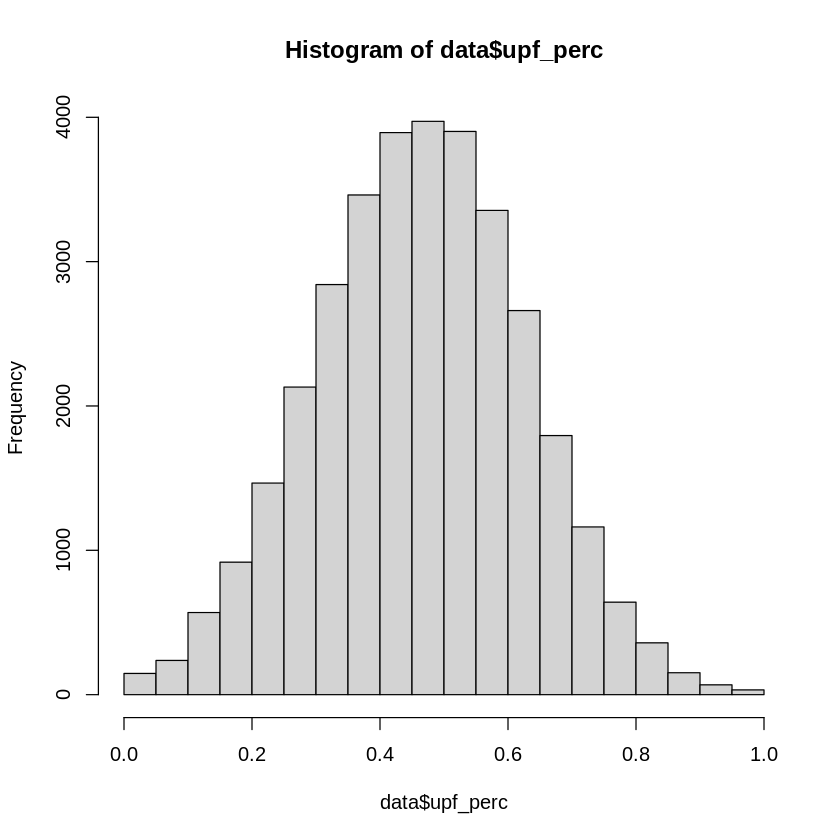

In [5]:
hist(data$upf_perc)

In [70]:
write.table(data, '/dagher/dagher11/filip/UPF/data/final_dataframe_all.csv', quote=T, sep=',',row.names=F)